In [3]:
import pandas as pd
import matplotlib.pyplot as plt

filename = '../data/stat/L5_1000.csv'

df = pd.read_csv(filename)
df

,topo,num_flows,seed,scheduler,is_scheduled,consuming_time
0,L5,40,2350,smt,True,112.272879
1,L5,10,2350,smt,True,0.000000
2,L5,20,2350,smt,True,0.000000
3,L5,30,2350,smt,True,0.000000
4,L5,60,2350,smt,True,277.592570
...,...,...,...,...,...,...
205,L5,20,2359,drl,True,0.000000
206,L5,30,2359,drl,True,0.000000
207,L5,60,2359,drl,False,300.005133
208,L5,70,2359,drl,False,300.000000


In [35]:
def plot_figure(df):
    topo = df['topo'].unique()
    assert len(topo) == 1
    topo = topo[0]
    num_seed = len(df['seed'].unique())
    print(f"{topo}, num_seed {num_seed}")
    num_flows_list = df.num_flows.unique()
    num_flows_list.sort()
    scheduler_list = df.scheduler.unique()
    res_sched = []
    for scheduler in scheduler_list:
        for num_flows in num_flows_list:
            df_temp = df[(df['scheduler'] == scheduler) & (df['num_flows'] == num_flows)]
            ratio = df_temp['is_scheduled'].sum() / len(df_temp)
            time = df_temp[df_temp['is_scheduled']]['consuming_time'].mean()
            res_sched.append([scheduler, num_flows, ratio, time])

    df_stat = pd.DataFrame(columns = ['scheduler', 'num_flows', 'ratio', 'time'], data=res_sched)

    fig, (ax1, ax2) = plt.subplots(2, 1)

    for scheduler in scheduler_list:
        df_temp = df_stat[df_stat['scheduler'] == scheduler]
        ax1.plot(df_temp['num_flows'], df_temp['ratio'], label=scheduler)
        ax2.plot(df_temp['num_flows'], df_temp['time'], label=scheduler)
    ax1.set_ylim(-0.1, 1.1)
    ax1.legend()
    ax2.legend()


In [7]:
topo = df['topo'].unique()
assert len(topo) == 1
topo = topo[0]

num_seed = len(df['seed'].unique())

f"{topo}, num_seed {num_seed}"

'L5, num_seed 10'

In [10]:
num_flows_list = df.num_flows.unique()
num_flows_list.sort()
num_flows_list


array([10, 20, 30, 40, 50, 60, 70])

In [5]:
scheduler_list = df.scheduler.unique()
scheduler_list

array(['smt', 'smt_no_wait', 'drl'], dtype=object)

In [11]:
res_sched = []
for scheduler in scheduler_list:
    for num_flows in num_flows_list:
        df_temp = df[(df['scheduler'] == scheduler) & (df['num_flows'] == num_flows)]
        ratio = df_temp['is_scheduled'].sum() / len(df_temp)
        time = df_temp[df_temp['is_scheduled']]['consuming_time'].mean()
        res_sched.append([scheduler, num_flows, ratio, time])

df_stat = pd.DataFrame(columns = ['scheduler', 'num_flows', 'ratio', 'time'], data=res_sched)
df_stat

,scheduler,num_flows,ratio,time
0,smt,10,1.0,0.000000
1,smt,20,1.0,0.000000
2,smt,30,1.0,0.000000
3,smt,40,1.0,95.110053
4,smt,50,1.0,0.000000
5,smt,60,1.0,260.006616
6,smt,70,1.0,362.668152
7,smt_no_wait,10,1.0,0.000000
8,smt_no_wait,20,1.0,0.000000
9,smt_no_wait,30,1.0,0.000000


L5, num_seed 10


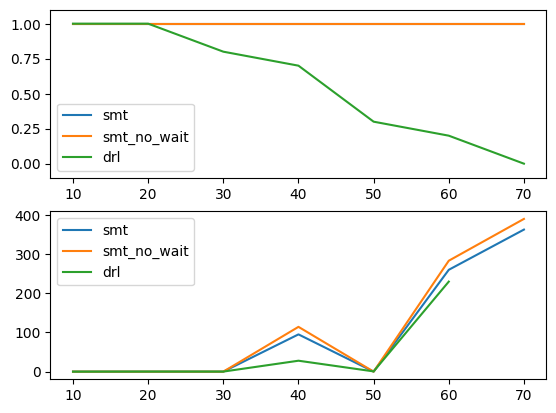

In [37]:
plot_figure(pd.read_csv("../data/stat/L5_1000.csv"))

CEV, num_seed 10


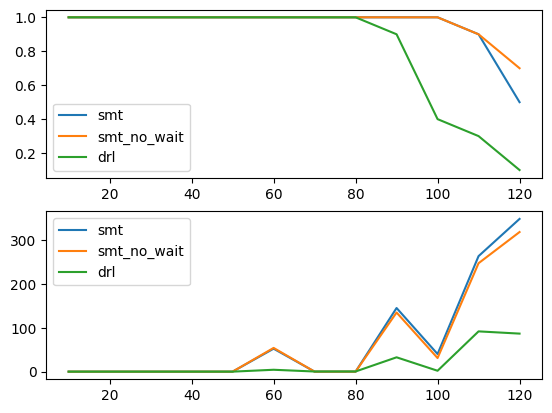

In [23]:
plot_figure(pd.read_csv('../data/stat/CEV_100.csv'))

CEV, num_seed 10


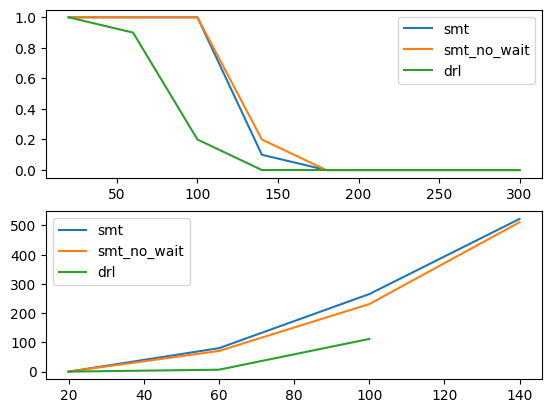

In [25]:
plot_figure(pd.read_csv('../data/stat/CEV_1000.csv'))

DiGraph with 10 nodes and 18 edges, num_seed 10


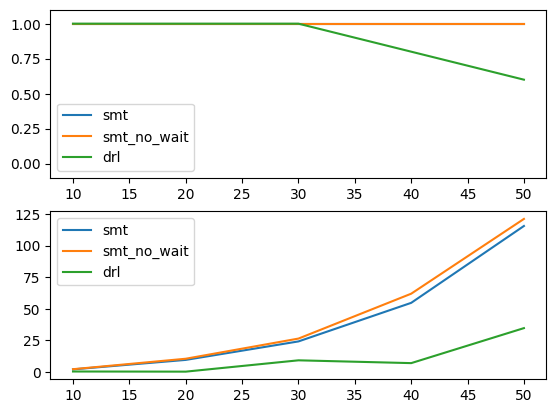

In [36]:
plot_figure(pd.read_csv('../data/stat/L5_100.csv'))